<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/Exam_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

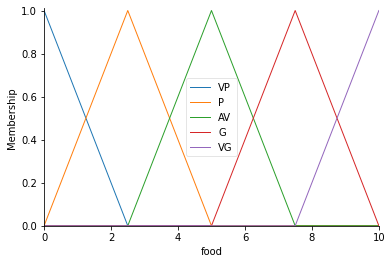

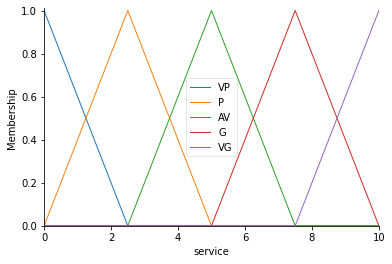

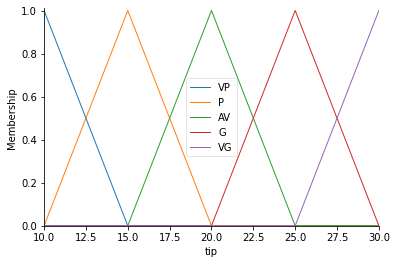

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe,'food')
names = ['VP', 'P', 'AV', 'G', 'VG']
service = ctrl.Antecedent(universe,'service')
tip = ctrl.Consequent(universe1,'tip')
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names)
food.view()
service.view()
tip.view()




<ipython-input-19-68b2892b7c93>:38: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-19-68b2892b7c93>:39: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-19-68b2892b7c93>:40: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)


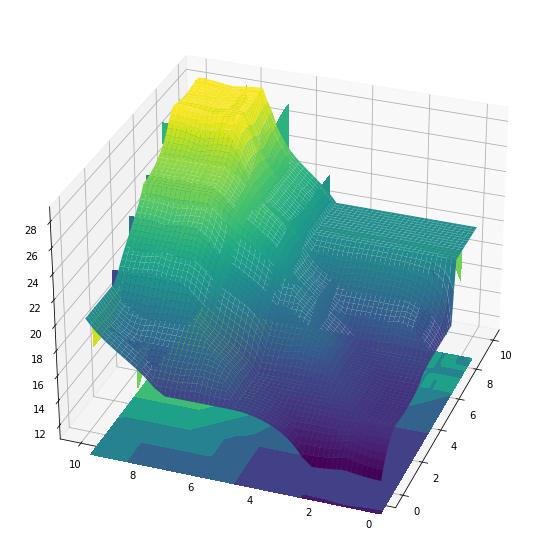

In [19]:
from skfuzzy.control.visualization import plt
from networkx.algorithms.bipartite import projection
from networkx import attr_sparse_matrix
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe = np.linspace(0,10,31)
universe1 = np.linspace(10,30,31)
food = ctrl.Antecedent(universe,'food')
names = ['VP', 'P', 'AV', 'G', 'VG']
service = ctrl.Antecedent(universe,'service')
tip = ctrl.Consequent(universe1,'tip')
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names)

rule0 = ctrl.Rule(antecedent = ((food['VP']&service['VP'])|(food['P']&service['VP'])|(food['VP']&service['P'])),consequent = tip['VP'], label = 'rule VP')
rule1 = ctrl.Rule(antecedent = ((food['VP']&service['AV'])|(food['VP']&service['G'])|(food['P']&service['P'])|(food['P']&service['AV'])|(food['AV']&service['VP'])|(food['AV']&service['P'])|(food['P']&service['VP'])), consequent = tip['P'], label = 'rule P')
rule2 = ctrl.Rule(antecedent = ((food['VP']&service['VG'])|(food['P']&service['G'])|(food['P']&service['VG'])|(food['AV']&service['AV'])|(food['G']&service['P'])|(food['G']&service['AV'])|(food['VG']&service['VP'])|(food['VG']&service['P'])|(food['VG']&service['AV'])), consequent = tip['AV'], label = 'rule AV')
rule3 = ctrl.Rule(antecedent = ((food['AV']&service['G'])|(food['AV']&service['VG'])),consequent = tip['G'], label = 'rule G')
rule4 = ctrl.Rule(antecedent = ((food['G']&service['G'])|(food['G']&service['VG'])|(food['VG']&service['G'])|(food['VG']&service['VG'])),consequent = tip['VG'], label = 'rule VG')
system = ctrl.ControlSystem(rules = [rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['tip']

# Ve surface, do thi cua ham va cac bien dau vao, be mat dieu khien
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)



In [2]:
pip install scikit-fuzzy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
